In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def __str__(self) -> str:
        return f"Point({self.x}, {self.y})"


class PayoffRes:
    def __init__(self, triangle_area: float, point1: Point, point2: Point, attempts: int):
        self.triangle_area = triangle_area
        self.point1 = point1
        self.point2 = point2
        self.attempts = attempts

    def __str__(self) -> str:
        return f"Res: \n\ta: {self.point1}\n\tb: {self.point2}\n\tarea: {self.triangle_area}, \n\tattempts: {self.attempts}"


In [8]:
def triangle_area(a: Point, b: Point, c: Point) -> float:
    return 0.5 * abs((b.x - a.x) * (c.y - a.y) - (c.x - a.x) * (b.y - a.y))


def generate_random_point(a: float, b: float) -> Point:
    return Point(random.uniform(0, b), random.uniform(0, a))


def center_line(b: float, a: float) -> float:
    return a / b

In [9]:
def pseudo_real_test(iterations: int, a: float, b: float):
    point1x: float = 0
    point1y: float = 0
    point2x: float = 0
    point2y: float = 0

    attempts_count: int = 0
    total_triangle_area: float = 0
    line = center_line(b, a)

    for i in range(iterations):
        # set points
        point_a = generate_random_point(a, b)
        point_b = generate_random_point(a, b)
        point_c = Point(0, 0)

        if (point_a.x * line > point_a.y) and (point_b.x * line < point_b.y):
            total_triangle_area += triangle_area(point_a, point_b, point_c)
            attempts_count += 1

            point1x += point_a.x
            point1y += point_a.y
            point2x += point_b.x
            point2y += point_b.y
            
    if attempts_count == 0:
        attempts_count = 1
    
    point1x /= attempts_count
    point1y /= attempts_count
    point2x /= attempts_count
    point2y /= attempts_count

    return PayoffRes(total_triangle_area / attempts_count, Point(point1x, point1y), Point(point2x, point2y),
                     attempts_count)


In [10]:
def plot_exp(a: float, b: float, point_a: Point, point_b: Point):
    fig, ax = plt.subplots()

    rectangle = patches.Rectangle((0, 0), b, a, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rectangle)

    point_a = (point_a.x, point_a.y)
    point_b = (point_b.x, point_b.y)
    point_c = (0, 0)

    line = plt.Line2D([0, b], [0, a], color='black')
    ax.add_line(line)
    triangle = patches.Polygon([point_a, point_b, point_c], closed=True, facecolor='red', alpha=0.5)
    ax.add_patch(triangle)

    ax.set_xlim(0, b)
    ax.set_xticks([0, b])
    ax.set_ylim(0, a)
    ax.set_yticks([0, a])
    plt.xlabel('b')
    plt.ylabel('a')

    plt.show()

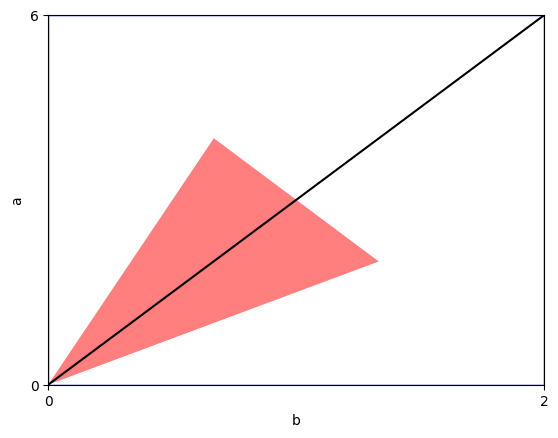

Res: 
	a: Point(1.3331519968172967, 2.0009125314187606)
	b: Point(0.668048293062866, 4.001989471647924)
	area: 1.9993175106535321, 
	attempts: 249655


In [32]:
if __name__ == '__main__':

    # PARAMS
    B: float = 2
    A: float = 6
    iterations: int = 1000000

    
    experiment = pseudo_real_test(iterations, A, B)
    plot_exp(A, B, experiment.point1, experiment.point2)
    print(experiment)